# Programming Exercise 7: K-means Clustering and Principal Component Analysis

# 2 Principal Component Analysis
In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset. The provided script will help you step through the first half of the exercise.

## 2.1 Example Dataset
To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The script will plot the training data (Figure 4). In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to
50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
import colorsys
import math

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Visualizing example dataset for PCA.




(0.94367994376443753,
 6.1478517074830386,
 2.6544689674327118,
 7.5874217500177625)

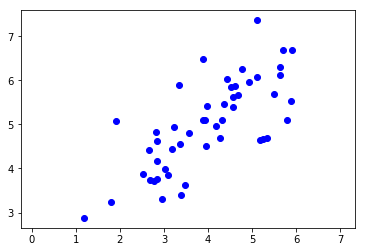

In [3]:
# ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to
#  visualize
#
print('Visualizing example dataset for PCA.\n\n');

#  The following command loads the dataset. You should now have the 
#  variable X in your environment
a = scipy.io.loadmat('ex7data1.mat')
X = a['X']

#  Visualize the example dataset
plt.plot(X[:,0], X[:,1], 'bo')
plt.axis([0.5, 6.5, 2, 8]);
plt.axis('equal')

## 2.2 Implementing PCA

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: First, you compute the covariance matrix of the data.
    
Then, you use SVD function to compute the eigenvectors $U_1, U_2, \cdots ,U_n$. These will correspond to the principal components of variation in the data.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. In the provided script ex7 pca.m, this normalization has been performed for you using the featureNormalize function.

After normalizing the data, you can run PCA to compute the principal components. You task is to complete the code in pca.m to compute the principal components of the dataset. First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m}X^TX$$

where X is the data matrix with examples in rows, and m is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute the principal components. In Python, you can run SVD with the following command: U, S, V = np.linalg.svd(Sigma), where U will contain the principal components and S will contain a diagonal matrix.

Once you have completed pca, the script will run PCA on the example dataset and plot the corresponding principal components found (Figure 5). The script will also output the top principal component (eigenvector) found, and you should expect to see an output of about [-0.707 -0.707]. (It is possible that Python may instead output the negative of this, since $U_1$ and $-U_1$ are equally valid choices for the first principal component.)

In [7]:
def drawLine(p1, p2, *args, **kwargs):
#DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure
    
    #plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'x-', color='k', mew=2)
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], *args, **kwargs)

In [4]:
def featureNormalize(X):
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [5]:
def pca(X):
#PCA Run principal component analysis on the dataset X
#   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
#   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
#

    # Useful values
    m, n = X.shape

    Sigma = np.dot(X.T, X) / m
    
    U, S, V = np.linalg.svd(Sigma)

    return U, S


Running PCA on example dataset.


Top eigenvector: 

 U(:,1) = -0.707107 -0.707107 


(you should expect to see -0.707107 -0.707107)



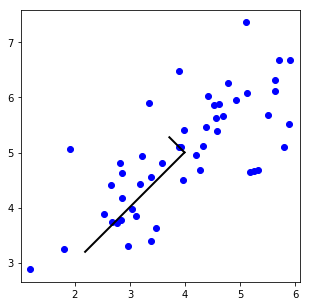

In [8]:
# =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m
#
print('\nRunning PCA on example dataset.\n\n')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
#hold on;
#drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
#drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
#hold off;
         
plt.figure(figsize=(5,5))
plt.plot(X[:,0], X[:,1], 'bo')
drawLine(mu, mu+1.5*S[0]*U[:,0], lw=2, color='k')
drawLine(mu, mu+1.5*S[1]*U[:,1], lw=2, color='k')
plt.xlim(0.5, 7)
plt.axis('equal')

print('Top eigenvector: \n')
print(' U(:,1) = %f %f \n' % (U[0,0], U[1,0]))
print('\n(you should expect to see -0.707107 -0.707107)\n')

## 2.3 Dimensionality Reduction with PCA
After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space.

In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

### 2.3.1 Projecting the data onto the principal components

You should now complete the code in projectData. Specifically, you are given a dataset X, the principal components U, and the desired number of dimensions to reduce to K. You should project each example in X onto the top K components in U. Note that the top K components in U are given by the first K columns of U, that is U_reduce = U(:, 1:K).

Once you have completed the code in projectData, the script will project the first example onto the first dimension and you should see a value of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$).

In [10]:
def projectData(X, U, K):
    
    return np.dot(X, U[:,:K])


Dimension reduction on example dataset.


Projection of the first example: 1.481274


(this value should be about 1.481274)




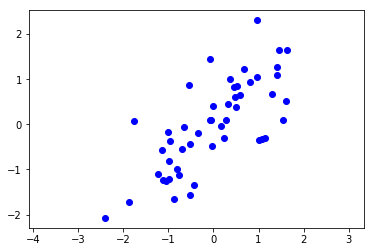

In [11]:
# =================== Part 3: Dimension Reduction ===================
#  You should now implement the projection step to map the data onto the 
#  first k eigenvectors. The code will then plot the data in this reduced 
#  dimensional space.  This will show you what the data looks like when 
#  using only the corresponding eigenvectors to reconstruct it.
#
#  You should complete the code in projectData.m
#
print('\nDimension reduction on example dataset.\n\n');

#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.axis('equal')

#  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
print('Projection of the first example: %f\n' % Z[0])
print('\n(this value should be about 1.481274)\n\n')

### 2.3.2 Reconstructing an approximation of the data
After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete recoverData to project each example in Z back onto the original space and return the recovered approximation in X rec.

Once you have completed the code in recoverData, the script will recover an approximation of the first example and you should see a value of about [-1.047 -1.047].

In [13]:
def recoverData(Z, U, K):
    return np.dot(Z, U[:,:K].T)

In [14]:
X_rec  = recoverData(Z, U, K);
print('Approximation of the first example: %f %f\n' % (X_rec[0, 0], X_rec[0, 1]))
print('\n(this value should be about  -1.047419 -1.047419)\n\n');

Approximation of the first example: -1.047419 -1.047419


(this value should be about  -1.047419 -1.047419)




### 2.3.3 Visualizing the projections

After completing both projectData and recoverData, the script will now perform both the projection and approximate reconstruction to show how the projection affects the data. In Figure 6, the original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$.

(-2.5963237431332358,
 1.8407218344969762,
 -2.4621584046320275,
 2.5334773551655174)

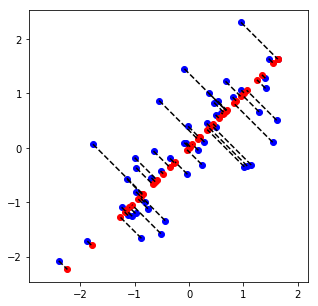

In [16]:
#  Draw lines connecting the projected points to the original points
plt.figure(figsize=(5,5))
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.plot(X_rec[:,0], X_rec[:,1], 'ro')

for ii in range(X_norm.shape[0]):
    drawLine(X_norm[ii,:], X_rec[ii,:], '--k')
    
plt.axis([-4, 3, -4, 3])
plt.axis('equal')

## 2.4 Face Image Dataset
In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset3 X of face images, each $32 \times 32$ in grayscale. Each row of X corresponds to one face image (a row vector of length 1024). The next step in script will load and visualize the first 100 of these face images (Figure 7).


In [18]:
def displayData(X):
    
    m = X.shape[0]
    plt.figure()
    
    nblock = int(np.sqrt(X.shape[1]))
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    # set up array
    fig, axarr = plt.subplots(nrows=display_rows, ncols=display_cols,
                              figsize=(10,10))

    # loop over randomly drawn numbers
    for ii in range(display_rows):
        for jj in range(display_cols):
            tmp = X[ii*display_cols+jj,:].reshape(nblock,nblock, order='F')
            axarr[ii,jj].imshow(tmp, cmap='gray')
            plt.setp(axarr[ii,jj].get_xticklabels(), visible=False)
            plt.setp(axarr[ii,jj].get_yticklabels(), visible=False)
            plt.minorticks_off()

    fig.subplots_adjust(hspace=0, wspace=0)


Loading face dataset.




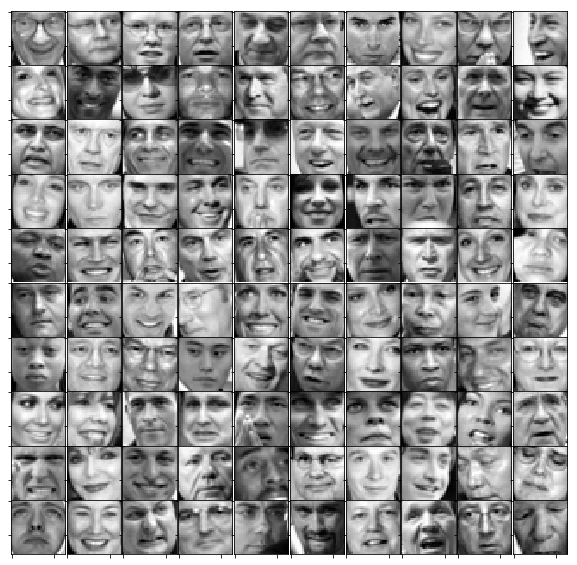

In [19]:
# =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment
#
print('\nLoading face dataset.\n\n');

#  Load Face dataset
mat = scipy.io.loadmat('ex7faces.mat')
X = mat['X']

#  Display the first 100 faces in the dataset
displayData(X[0:100, :]);

### 2.4.1 PCA on Faces
To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix X. The script will do this for you and then run your PCA code. After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in U (each row) is a vector of length n (where for the face dataset, n = 1024). It turns out that we can visualize these principal components byreshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. The script displays the first 36 principal components that describe the largest variations (Figure 8). If you want, you can also change the code to display more principal components to see how they capture more and more details.


Running PCA on face dataset.
 (this might take a minute or two ...)




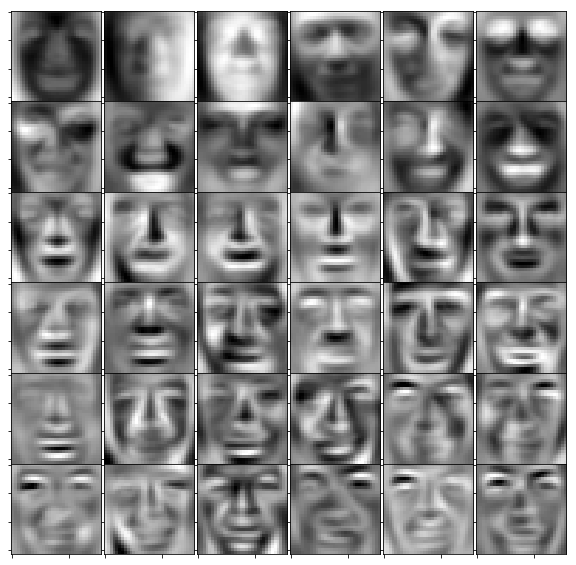

In [21]:
# =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.
#
print('\nRunning PCA on face dataset.\n (this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, 0:36].T)

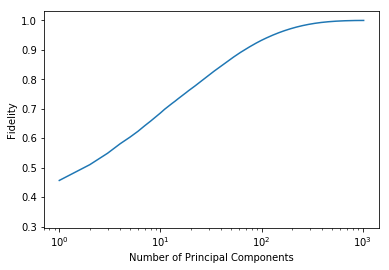

In [22]:
# get cumulative sum of principal components (i.e. fidelity)
plt.semilogx(np.cumsum(S/S.sum()))
plt.ylabel('Fidelity')
plt.xlabel('Number of Principal Components')

### 2.4.2 Dimensionality Reduction
Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next part in the script will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z(i) \in \Bbb{R}^{100}$.

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. In the script, an approximate recovery of the data is performed and the original and projected face images are displayed side by side (Figure 9). From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10X) in the dataset size that can help speed up your learning algorithm significantly.

For example, if you were training a neural network to perform person recognition (given a face image, predict the identitfy of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.


Dimension reduction for face dataset.


The projected data Z has a size of: 
(5000, 100)

Visualizing the projected (reduced dimension) faces.




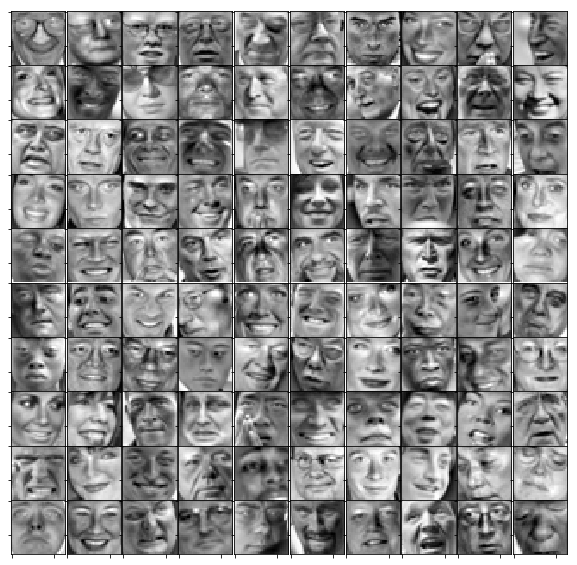

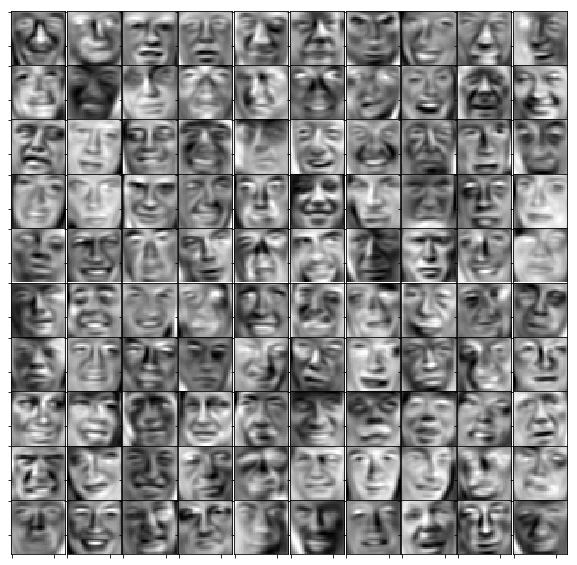

In [23]:
# ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
print('\nDimension reduction for face dataset.\n\n');

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print(Z.shape)

# ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print('\nVisualizing the projected (reduced dimension) faces.\n\n')

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
displayData(X_norm[0:100,:])

# Display reconstructed data from only k eigenfaces
displayData(X_rec[0:100,:])


## 2.5 Optional (ungraded) exercise: PCA for visualization

In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space. In the last part of the script, we have provided code to visualize the final pixel assignments in this 3D space using the scatter3 function. Each data point is colored according to the cluster it has been assigned to. You can drag your mouse on the figure
to rotate and inspect this data in 3 dimensions.

It turns out that visualizing datasets in 3 dimensions or greater can be cumbersome. Therefore, it is often desirable to only display the data in 2D even at the cost of losing some information. In practice, PCA is often used to reduce the dimensionality of data for visualization purposes. In the next part of script, the script will apply your implementation of PCA to the 3-
dimensional data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the "best" view.

In [33]:
def findClosestCentroids(X, centroids):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros((X.shape[0], 1))

    dist = np.zeros((X.shape[0], K))

    for i in range(0, K):
        dist[:, i] = np.sum((X - centroids[i,:])**2, axis=1)

    p = np.argmin(dist, axis=1)
    
    return p

In [35]:
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the 
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.
#

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))

    for i in range(0, K):
        centroids[i, :] = np.mean(X[idx==i, :], axis=0)
        
    return centroids

In [26]:
def kMeansInitCentroids(X, K):
#KMEANSINITCENTROIDS This function initializes K centroids that are to be 
#used in K-Means on the dataset X
#   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
#   used with the K-Means on the dataset X
#

    # You should return this values correctly
    ind = np.random.permutation(X.shape[0])
    
    return X[ind[:K], :]

In [28]:
def plotDataPoints(X, idx, K):
#PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
#index assignments in idx have the same color
#   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
#   with the same index assignments in idx have the same color

    HSV_tuples = [(x*1.0/K, 1, 1) for x in range(K)]
    palette = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    colors = [palette[i] for i in idx]

    # Plot the data
    plt.scatter(X[:,0], X[:,1], c=colors);

In [29]:
def drawLine(p1, p2, *args, **kwargs):
#DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure
    
    #plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'x-', color='k', mew=2)
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], *args, **kwargs)

In [30]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
#PLOTPROGRESSKMEANS is a helper function that displays the progress of 
#k-Means as it is running. It is intended for use only with 2D data.
#   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
#   points with colors assigned to each centroid. With the previous
#   centroids, it also plots a line between the previous locations and
#   current locations of the centroids.
#

    # Plot the examples
    plotDataPoints(X, idx, K)

    # Plot the centroids as black x's
    plt.plot(centroids[:,0], centroids[:,1], 'xk', mew=2)

    # Plot the history of the centroids with lines
    for j in range(0, centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], 'x-', color='k', mew=2);

    # Title
    plt.title('Iteration number %d' % i)

In [31]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
#RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
#is a single example
#   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
#   plot_progress) runs the K-Means algorithm on data matrix X, where each 
#   row of X is a single example. It uses initial_centroids used as the
#   initial centroids. max_iters specifies the total number of interactions 
#   of K-Means to execute. plot_progress is a true/false flag that 
#   indicates if the function should also plot its progress as the 
#   learning happens. This is set to false by default. runkMeans returns 
#   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    # Run K-Means
    for i in range(0, max_iters):
        # Output progress
        print('K-Means iteration %d/%d...\n' % (i, max_iters))

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)

        # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids;

        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

    return centroids, idx

In [ ]:
# === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.


# Reload the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first
#A = double(imread('bird_small.png'));

# If imread does not work for you, you can try instead
mat = scipy.io.loadmat('bird_small.mat')
A = mat['A']

A = A / 255
img_size = A.shape
X = np.reshape(A, (img_size[0] * img_size[1], 3))
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.floor(np.random.rand(1000) * X.shape[0])
sel = sel.astype(int)

#  Setup Color Palette
HSV_tuples = [(x*1.0/K, 1, 1) for x in range(K)]
palette = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
colors = [palette[i] for i in idx]

#  Visualize the data and centroid memberships in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for x, c in zip(X[sel, :], np.array(colors)[sel]):
    ax.scatter(x[0], x[1], x[2], c=c)

plt.show()

# === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
plotDataPoints(Z[sel, :], idx[sel], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')

K-Means iteration 0/10...

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

